# Crash course in Python used in EDA

We are going to be moving quickly through exploratory data analysis, which will necessarily assume some competence in key areas a Python. I've tried to include a number of the key Python elements in this notebook for you. We will go over this in class, but I suggest in your infinite spare time you review it and.

## Assignment versus expression

The simplest assignments look like *variable* = *expression* where *expression* can be arbitrarily complex:

In [17]:
x = 10                   # an assignment with simple right-hand side

In [22]:
y = sum([1,10,100,1000]) # an assignment with more complex right-hand side

In [19]:
x      # an expression

10

In [20]:
x*1.5 # an expression

15.0

In [23]:
sum([1,10,100,1000]) # an expression

1111

Because we are executing this Python code within a Jupyter notebook, the code snippets are executed immediately.

<img src="images/redbang.png" width="30" align="left">The value of the last expression in any notebook cell is printed by Jupyter.

We can also print the result of multiple expressions in a single cell:

In [21]:
x*3.14, y

(31.400000000000002, 1111)

## Indexing lists or similar collections

One of the most important operators we will use in expressions is the `[...]` indexing operator. You are likely familiar with this already for accessing the elements of lists.  The index is typically an integer and the first element is that position 0:

In [28]:
a = [10,20,30,40]  # define a list with four numbers
a[0]               # print the first element

10

In [29]:
a[-1]              # print the last value

40

In [30]:
a[1:3]             # print the 2nd and 3rd values

[20, 30]

If we have a list of lists, it looks like a matrix and we access with two index operations to get an element:

In [38]:
a = [[1,2,3],      # a list of lists
     [4,5,6]]
a

[[1, 2, 3], [4, 5, 6]]

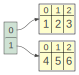

In [34]:
from lolviz import *   # Terence built this cool visualization package for objects
objviz(a)              # show me the structure of the object pointed to by a

In [35]:
a[0]    # first row

[1, 2, 3]

In [37]:
a[0][2]  # first row, third element (element at position two)

3

Just to be clear what's going on `a` is a list of lists. So, `a[0]` accesses the first element which is a list. If it is a list, we can access the elements like `a[0][2]`, which is equivalent to `(a[0])[2]`, if that helps you to see the order of operations.

We will very commonly convert this nested list into a numpy array and then the indexing operator changes:

In [41]:
import numpy as np  # import and give it a shorthand name "np"
a = np.array(a)
a

array([[1, 2, 3],
       [4, 5, 6]])

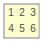

In [106]:
objviz(a) # using lolviz again

In [43]:
a[0,2]              # instead of a[0][2], use this

3

The syntax for indexing is overloaded to also mean: "get an element from a dictionary":

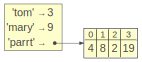

In [107]:
d = {"tom":3, "mary":9, "parrt":[4,8,2,19]}  # define a dictionary
objviz(d)

In [54]:
d["tom"]

3

In [50]:
d['parrt']

[4, 8, 2, 19]

In [52]:
d['parrt'][3]     # get list for key 'parrt' then access element at position 3

19

## Packages / modules

There are a vast number of libraries available in Python to help you do your job. You can think of each library as a book of recipes and each recipe is a function. Because there are so many, we have to explicitly tell Python to import the library or libraries we'd like to use (there could be conflicting function names between them so we have to be explicit).

<img src="images/redbang.png" width="30" align="left">In common practice, we mix up the terms package and module, but [to be precise](https://stackoverflow.com/questions/7948494/whats-the-difference-between-a-python-module-and-a-python-package#:~:text=A%20package%20is%20a%20collection%20of%20Python%20modules%3A%20while%20a,a%20bunch%20of%20Python%20scripts.) a Python *module* is a single Python file like my `lolviz` above. A *package* is a directory with a collection of modules (python files).

Let's say we wanted to compute the area of a circle with radius $r$ ($\pi r ^2$).  We could just remember a bit of $pi$, such as 3.14159, but it's better to use a built-in variable defined in the math package:

In [26]:
import math     # tell Python we want to use stuff inside math package
r = 2
math.pi * r**2  # pi is a var inside math and "**"" is the power operator

12.566370614359172

The basic syntax is *packagename*.*variable* or, for functions in a package, *packagename*.*function(...)*. 

It's also possible to have packages within packages. Numpy is a numerical library we will use frequently and it has a function to get a matrix of random numbers. Within package `numpy` we access the `random` package and then the `rand()` function:

In [27]:
import numpy as np  # import and give it a shorthand name "np"
np.random.rand(2,3)

array([[0.35166607, 0.41375476, 0.58495631],
       [0.04575451, 0.18897379, 0.69708789]])

<img src="images/redbang.png" width="30" align="left">The `.` (dot operator) is severely overloaded to mean multiple things; in fact a program is able to redefine what it means. Just keep in mind that `.` means:

1. Access a member of a package, which can be a variable, function, or another package
1. Access a member of an object, which can be a field or function

## Functions

Python programs consist of zero or more functions and the so-called "main" program, consisting of a sequence of operations that gets the ball rolling.

We begin planning a function by identifying:

1. a descriptive function name
1. the kind of value(s) it operates on (parameter types)
1. the kind of value it returns (return type)
1. what the function does and the value it returns

If we can't specifying exactly what goes in and out of the function, there's no hope of determining the processing steps, let alone Python code, to implement that function.

<img src="images/redbang.png" width="30" align="left">The Python interpreter does not execute the code inside the function unless we directly invoke that function. Python sees the function definition as just that: a "recipe" definition that we can call if we want.

In [5]:
def hi():
    print("hi")
print("this is part of main not part of function")

this is part of main not part of function


The definition of a function is different than invoking or calling a function. Calling a function requires the function name and any argument values. In this case, we don't have any arguments so we call the function as just hi():

In [55]:
hi()

hi


Let's define a function that returns a value, rather then printing a value:

In [56]:
def pi():            # no arguments
    return 3.14159   # return type is float

In [7]:
pi()

3.14159

In [57]:
pi                   # this is the name of a function but does not execute the function

<function __main__.pi()>

Functions `hi` and `pi` are not attached in some sense to a package (technically they are part of the main module) and we can just call them without the "dot" operator. If we put them in module `foo`, then we could refer to them elsewhere as `foo.hi()` and `foo.pi()`.

## Objects

Everything in Python is an object and there are way too many details to going to here; you can check out my [OO notes](https://github.com/parrt/msds501/blob/master/notes/OO.ipynb) though for more details.

As it pertains to what we do in EDA, we are very frequently going to call functions that are embedded within objects.  If you've played with Python strings before, you do this quite frequently. For example:

In [60]:
"parrt".upper(), "parrt".index('t')

('PARRT', 4)

Note that `len()` is a function not associated specifically with strings and so we call that generic function with the object as an argument:

In [61]:
len("parrt")

5

Again we are overloading the dot operator to mean object member access. The syntax is typically *object*.*function(...)*. Things get complicated when we combine indexing with member access. Here's a preview of some data frame accessing:

In [63]:
import pandas as pd
df_cars = pd.read_csv("data/cars.csv") # get data into df_cars object
df_cars.head(3)                        # show first 3 rows

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


In [64]:
df_cars['CYL'].unique() # get unique elements in column CYL

array([8, 4, 6, 3, 5])

Things can get even more complex if we change the function calls together:

In [71]:
df_cars['MPG'].value_counts().head(5)

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
Name: MPG, dtype: int64

Or when we do operations and then call function on the resulting object:

In [68]:
(df_cars['MPG'] / df_cars['WGT']).head(5)

0    0.005137
1    0.004062
2    0.005239
3    0.004661
4    0.004929
dtype: float64

Let me break that apart for you:

In [69]:
mpg = df_cars['MPG']
wgt = df_cars['WGT']
mpg_per_pound = mpg / wgt
mpg_per_pound.head(5)

0    0.005137
1    0.004062
2    0.005239
3    0.004661
4    0.004929
dtype: float64

chain function results
Altering arguments

### Function argument and return value types

It's critical that you know the types of the values going into functions and coming out via return statements.


In [77]:
def triple(a):
    print("type is", type(a))
    return 3*a

In [78]:
triple(3)

type is <class 'int'>


9

In [83]:
triple(4.5)

type is <class 'float'>


13.5

In [84]:
triple([1,2,3])

type is <class 'list'>


[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [85]:
triple(np.array([1,2,3]))

type is <class 'numpy.ndarray'>


array([3, 6, 9])

Now, see what happens when the return value is of different types. It affects how we can use the result.

In [92]:
def stuff(): return [[9,7,5], [10,15,20]]

In [93]:
x = stuff()
x[1][1]

15

In [94]:
x[1,1] # ERROR!

TypeError: list indices must be integers or slices, not tuple

In [95]:
def npstuff(): return np.array( [[9,7,5], [10,15,20]] )

In [98]:
y = npstuff()
y[1][1], y[1,1]

(15, 15)

## Return values versus printing

Just to pound this concept into your heads...

One of the big confusion points for students is the difference between return values and printing results.

Programs in the analytics world typically read data from a file and emit output or write data to another file. In other words, programs interact with the world outside of the program. The world outside of the program is usually the network, the disk, or the screen. In contrast, most functions that we write won't interact with the outside world.

<img src="images/redbang.png" width="30" align="left">Functions compute and return (give values back) to their caller. They don't print anything to the user unless explicitly asked to do so with a `print` statement.

In [102]:
def pi():
    print(3.14159) # This is not a return statement!
    # return value is None

In [103]:
print(pi())

3.14159
None


In [104]:
pi()

3.14159
